<a href="https://colab.research.google.com/github/ozzysp/predict_prices_airbnb/blob/main/predict_prices_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [56]:
months = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6,
         'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

path_bases = pathlib.Path('/content/drive/MyDrive/dataset/')

base_airbnb = pd.DataFrame()

for file in path_bases.iterdir():
    name_month = file.name[:3]
    month = months[name_month]
    
    year = file.name[-8:]
    year = int(year.replace('.csv', ''))
    
    df = pd.read_csv(path_bases / file.name, low_memory=False)
    df['year'] = year
    df['month'] = month
    base_airbnb = base_airbnb.append(df)

display(base_airbnb)
print(base_airbnb)



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,year,month
0,17878,https://www.airbnb.com/rooms/17878,20190923212307,2019-09-24,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,30,4.0,4.0,30.0,30.0,4.0,30.0,2 weeks ago,t,22,47,77,312,2019-09-24,238,24.0,2010-07-15,2019-08-24,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.13,2019,9
1,25026,https://www.airbnb.com/rooms/25026,20190923212307,2019-09-24,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/9e204f80-1...,https://a0.muscache.com/im/pictures/9e204f80-1...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,60,7.0,7.0,60.0,60.0,7.0,60.0,5 weeks ago,t,11,41,71,114,2019-09-24,233,16.0,2010-06-07,2019-08-03,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.06,2019,9
2,31560,https://www.airbnb.com/rooms/31560,20190923212307,2019-09-24,NICE & COZY 1BDR - IPAN

             id                            listing_url  ...  year month
0         17878     https://www.airbnb.com/rooms/17878  ...  2019     9
1         25026     https://www.airbnb.com/rooms/25026  ...  2019     9
2         31560     https://www.airbnb.com/rooms/31560  ...  2019     9
3         35636     https://www.airbnb.com/rooms/35636  ...  2019     9
4         35764     https://www.airbnb.com/rooms/35764  ...  2019     9
...         ...                                    ...  ...   ...   ...
33719  39470009  https://www.airbnb.com/rooms/39470009  ...  2019    10
33720  39470135  https://www.airbnb.com/rooms/39470135  ...  2019    10
33721  39470919  https://www.airbnb.com/rooms/39470919  ...  2019    10
33722  39473081  https://www.airbnb.com/rooms/39473081  ...  2019    10
33723  39476866  https://www.airbnb.com/rooms/39476866  ...  2019    10

[639086 rows x 108 columns]


In [57]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('first_records.csv', sep=';')


['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [58]:
columns = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude',
           'longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type',
           'amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
           'maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','year','month']

base_airbnb = base_airbnb.loc[:, columns]
print(list(base_airbnb.columns))
display(base_airbnb)
print(base_airbnb)


['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'year', 'month']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,within an hour,100%,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$329.00,$0.00,$374.00,2,$62.00,4,30,238,93.0,9.0,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2019,9
1,within a few hours,100%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$158.00,"$1,000.00",$250.00,2,$45.00,7,60,233,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
2,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$270.00,$0.00,$83.00,2,$42.00,2,1125,264,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2019,9
3,within a few hours,100%,t,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$374.00,"$1,040.00",$171.00,2,$62.00,2,89,162,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2019,9
4,within an hour,100%,t,1.0,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$129.00,$400.00,$140.00,2,$80.00,3,28,309,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33719,NaN,NaN,f,1.0,-22.89922,-43.17812,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$66.00,NaN,NaN,1,$0.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10
33720,NaN,NaN,f,1.0,-23.01116,-43.37109,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$189.00,NaN,NaN,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10
33721,NaN,NaN,f,0.0,-22.96773,-43.39094,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",$181.00,$0.00,$45.00,1,$90.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,moderate,2019,10
33722,NaN,NaN,f,1.0,-23.00289,-43.39096,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$127.00,NaN,NaN,1,$0.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10


       host_response_time host_response_rate  ...  year  month
0          within an hour               100%  ...  2019      9
1      within a few hours               100%  ...  2019      9
2          within an hour               100%  ...  2019      9
3      within a few hours               100%  ...  2019      9
4          within an hour               100%  ...  2019      9
...                   ...                ...  ...   ...    ...
33719                 NaN                NaN  ...  2019     10
33720                 NaN                NaN  ...  2019     10
33721                 NaN                NaN  ...  2019     10
33722                 NaN                NaN  ...  2019     10
33723        within a day                50%  ...  2019     10

[639086 rows x 34 columns]


In [59]:
for column in base_airbnb:
    if base_airbnb[column].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(column, axis=1)
print(base_airbnb.isnull().sum())


host_response_time          271415
host_response_rate          271415
host_is_superhost              349
host_listings_count            349
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                     1212
bedrooms                       643
beds                          1868
bed_type                         0
amenities                        0
price                            0
security_deposit            291514
cleaning_fee                217514
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
year                             0
month                            0
dtype: int64


In [60]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())
display(base_airbnb)


(230929, 27)
host_response_time          0
host_response_rate          0
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
security_deposit            0
cleaning_fee                0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
year                        0
month                       0
dtype: int64


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,within an hour,100%,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$329.00,$0.00,$374.00,2,$62.00,4,30,238,t,f,strict_14_with_grace_period,2019,9
1,within a few hours,100%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$158.00,"$1,000.00",$250.00,2,$45.00,7,60,233,f,f,strict_14_with_grace_period,2019,9
2,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$270.00,$0.00,$83.00,2,$42.00,2,1125,264,t,f,strict_14_with_grace_period,2019,9
3,within a few hours,100%,t,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$374.00,"$1,040.00",$171.00,2,$62.00,2,89,162,f,f,strict_14_with_grace_period,2019,9
4,within an hour,100%,t,1.0,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$129.00,$400.00,$140.00,2,$80.00,3,28,309,f,f,strict_14_with_grace_period,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33700,within a few hours,87%,f,35.0,-22.96539,-43.17448,Apartment,Entire home/apt,12,6.5,6.0,6.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...","$10,359.00","$4,144.00",$829.00,1,$0.00,3,360,0,f,f,flexible,2019,10
33702,within a few hours,96%,f,10.0,-22.93711,-43.18908,Apartment,Entire home/apt,5,1.0,3.0,5.0,Real Bed,"{TV,Kitchen,""Smoking allowed"",Elevator,Essenti...",$502.00,$0.00,$300.00,1,$0.00,1,12,0,f,f,flexible,2019,10
33703,within an hour,100%,t,302.0,-22.98453,-43.20310,Apartment,Entire home/apt,12,4.0,4.0,6.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$600.00,"$1,000.00",$320.00,1,$0.00,3,1125,0,f,f,strict_14_with_grace_period,2019,10
33704,within a few hours,75%,f,8.0,-23.00152,-43.30734,Chalet,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$156.00,$600.00,$168.00,1,$0.00,1,1125,0,f,f,flexible,2019,10


In [61]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])


host_response_time           object
host_response_rate           object
host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
security_deposit             object
cleaning_fee                 object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object
--------------

In [62]:

base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].str.replace('%', '')
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].str.replace(',', '')
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].astype(np.float32, copy=False)

base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace('$', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace(',', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].astype(np.float32, copy=False)

base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace('$', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace(',', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)


host_response_time           object
host_response_rate          float32
host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
security_deposit            float32
cleaning_fee                float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object


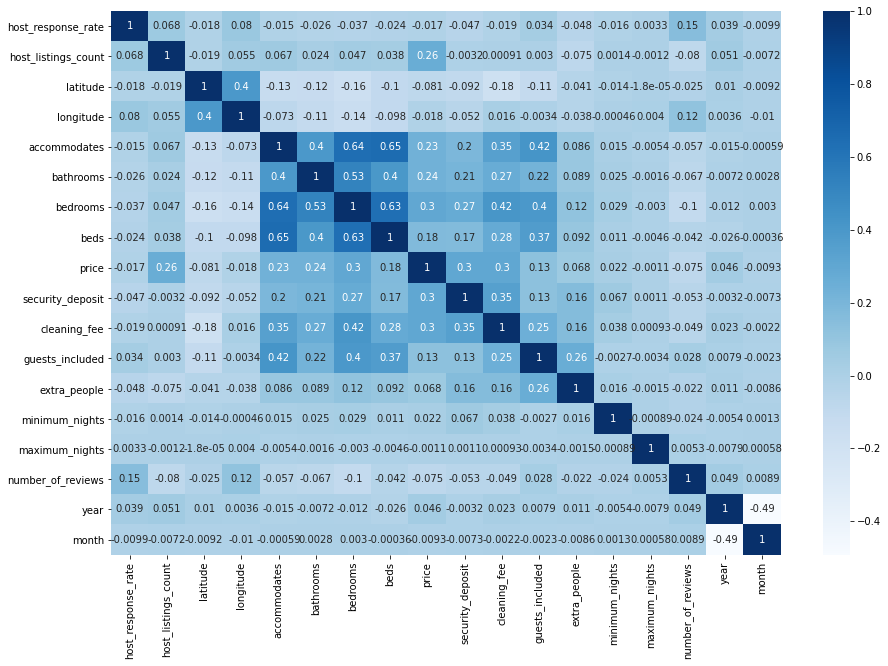

In [63]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Blues')


In [64]:
def bounds(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    delta = q3 - q1
    return q1 - 1.5 * delta, q3 + 1.5 * delta

def exclude_outliers(df, name_column):
    lines_qtt = df.shape[0]
    lim_inf, lim_sup = bounds(df[name_column])
    df = df.loc[(df[name_column] >= lim_inf) & (df[name_column] <= lim_sup), :]
    removed_lines = lines_qtt - df.shape[0]
    return df,  removed_lines
    

In [65]:
def diagram_box(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(bounds(column))
    sns.boxplot(x=column, ax=ax2)

def histogram(column):
    plt.figure(figsize=(15, 5))
    sns.distplot(column, hist=True)

def bar_graph(column):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(bounds(column))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



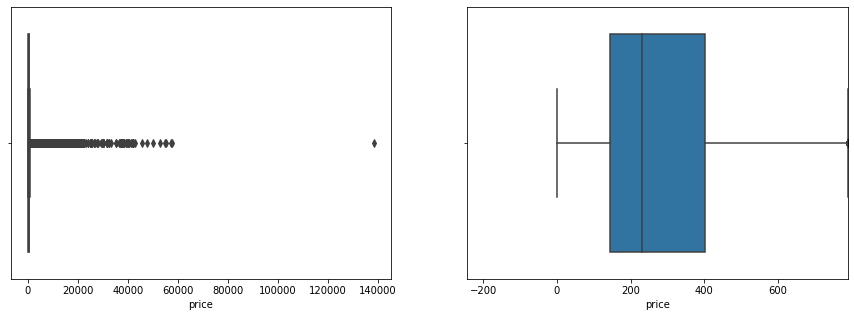

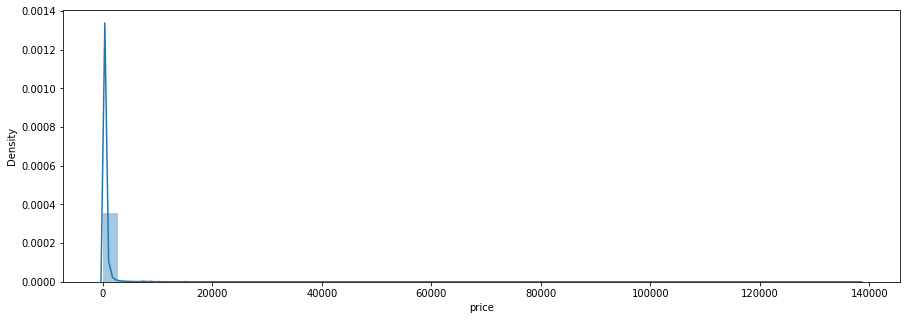

In [66]:
diagram_box(base_airbnb['price'])
histogram(base_airbnb['price'])


In [67]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'price')
print('{} removed lines'.format(removed_lines))


24429 removed lines


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(206500, 27)


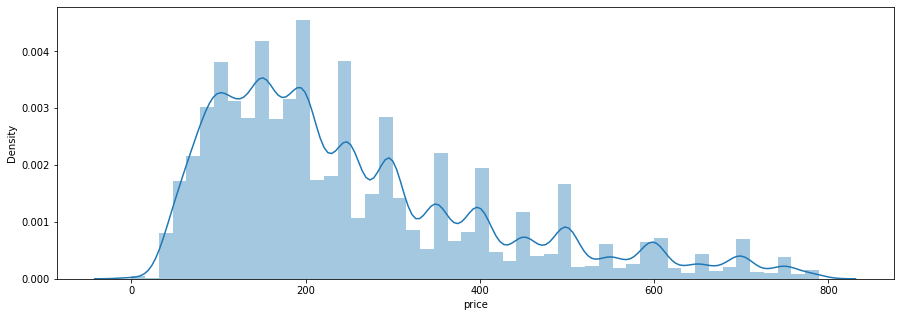

In [68]:
histogram(base_airbnb['price'])
print(base_airbnb.shape)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



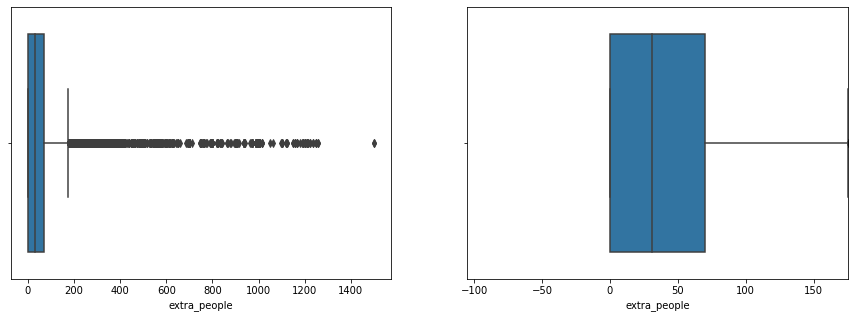

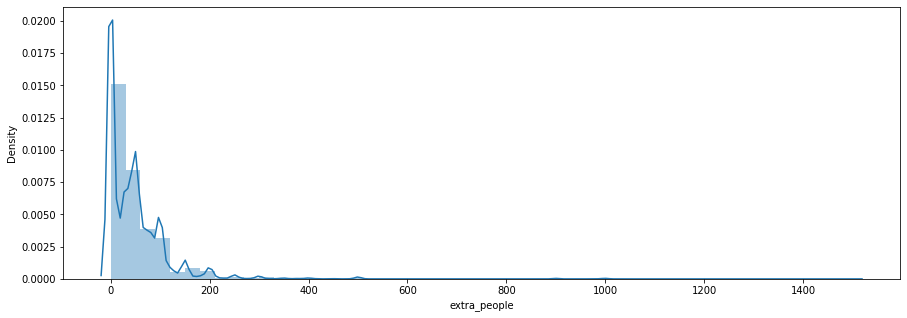

In [69]:
diagram_box(base_airbnb['extra_people'])
histogram(base_airbnb['extra_people'])

In [70]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'extra_people')
print('{} removed lines'.format(removed_lines))


8278 removed lines


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(198222, 27)


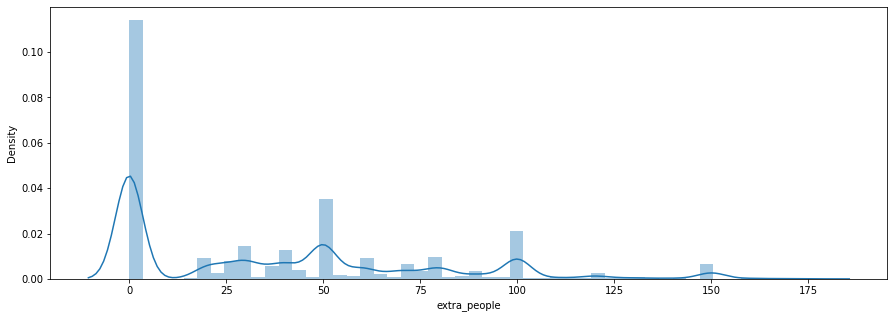

In [71]:
histogram(base_airbnb['extra_people'])
print(base_airbnb.shape)

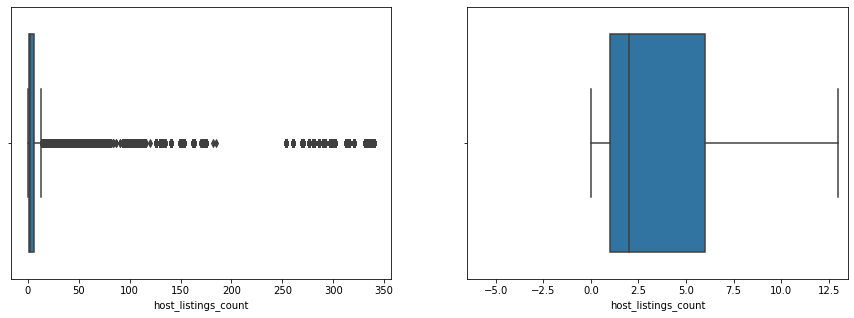

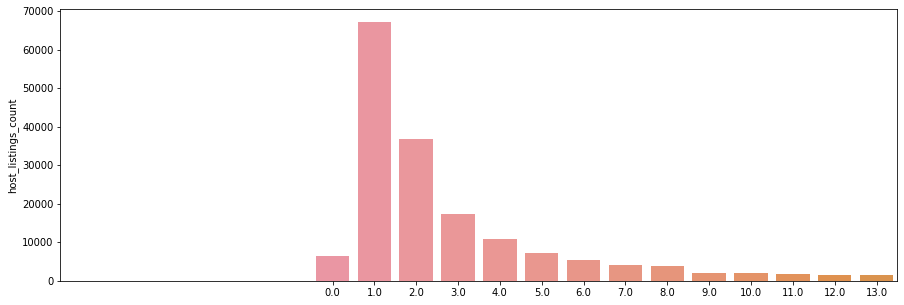

In [72]:
diagram_box(base_airbnb['host_listings_count'])
bar_graph(base_airbnb['host_listings_count'])


In [73]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'host_listings_count')
print('{} removed lines'.format(removed_lines))


29997 removed lines


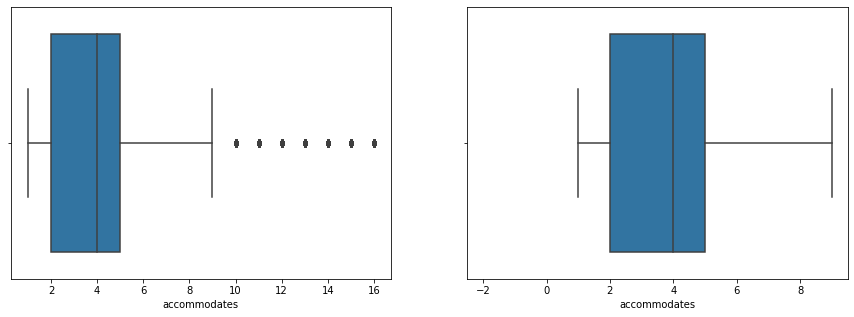

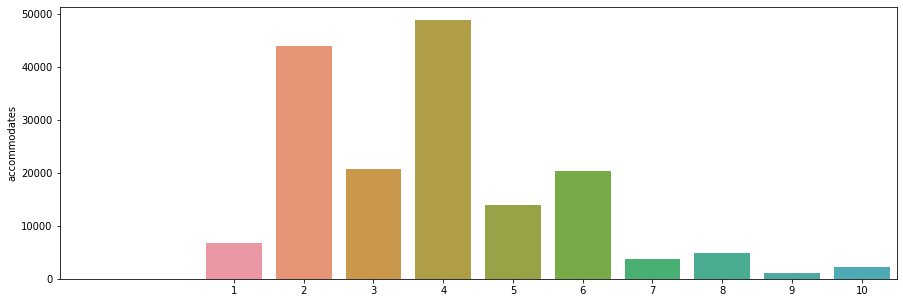

In [74]:
diagram_box(base_airbnb['accommodates'])
bar_graph(base_airbnb['accommodates'])


In [75]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'accommodates')
print('{} removed lines'.format(removed_lines))


4084 removed lines


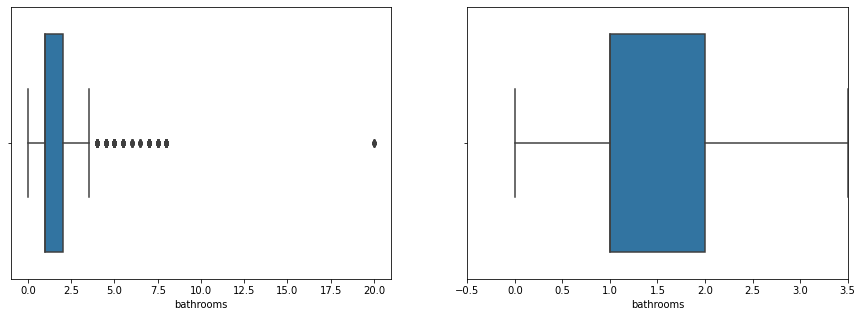

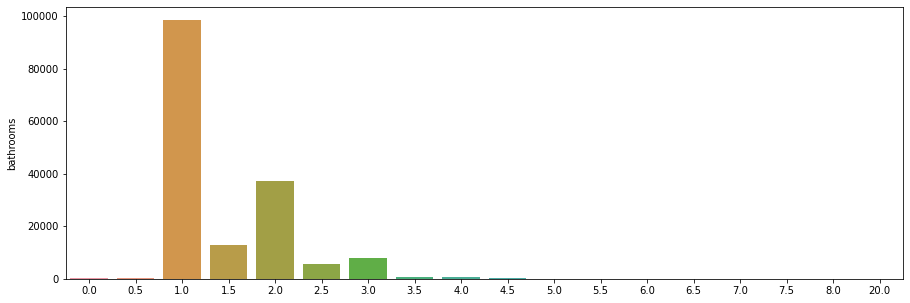

In [76]:
diagram_box(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())


In [77]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'bathrooms')
print('{} removed lines'.format(removed_lines))


1273 removed lines


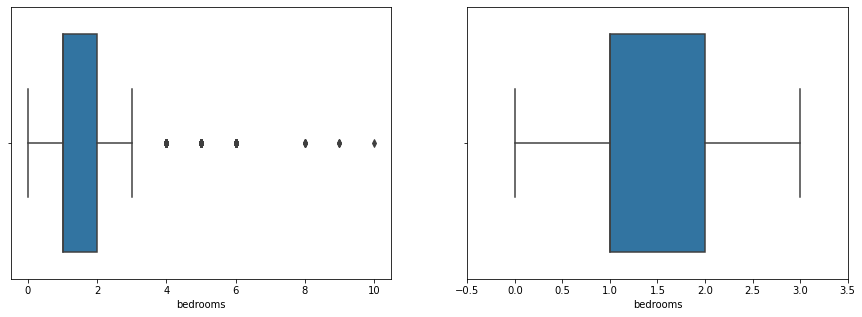

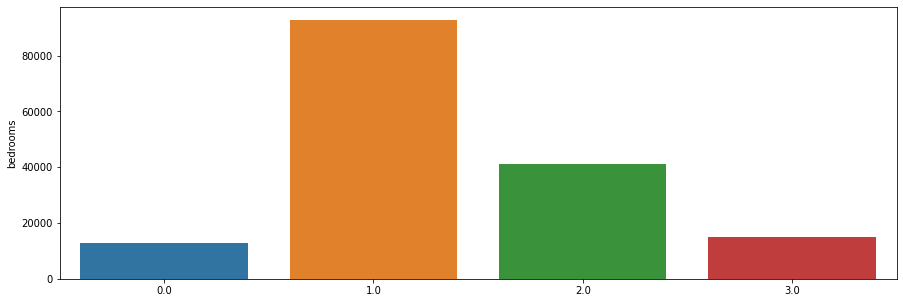

In [78]:
diagram_box(base_airbnb['bedrooms'])
bar_graph(base_airbnb['bedrooms'])


In [79]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'bedrooms')
print('{} removed lines'.format(removed_lines))


1115 removed lines


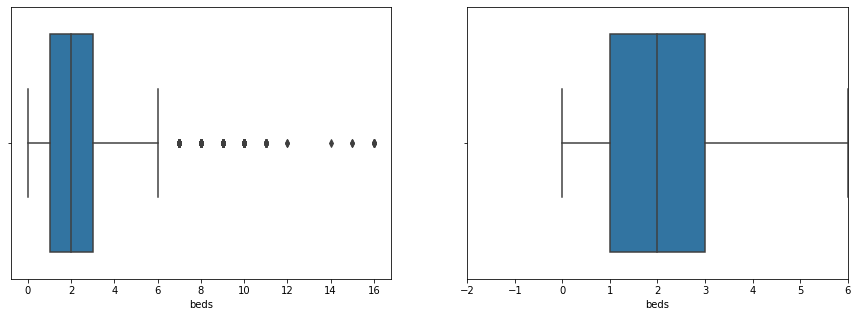

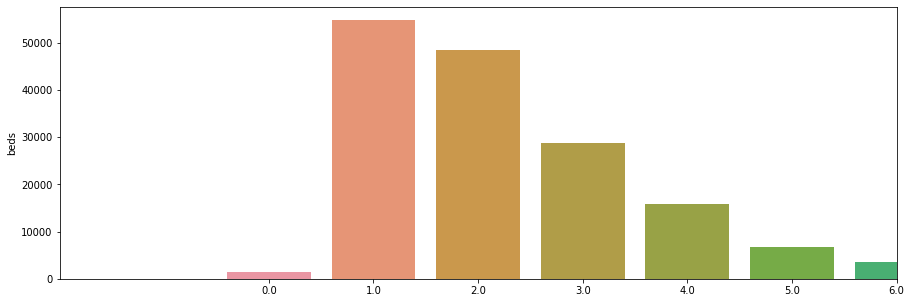

In [80]:
diagram_box(base_airbnb['beds'])
bar_graph(base_airbnb['beds'])


In [81]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'beds')
print('{} removed lines'.format(removed_lines))


2068 removed lines


(-0.5, 3.5)


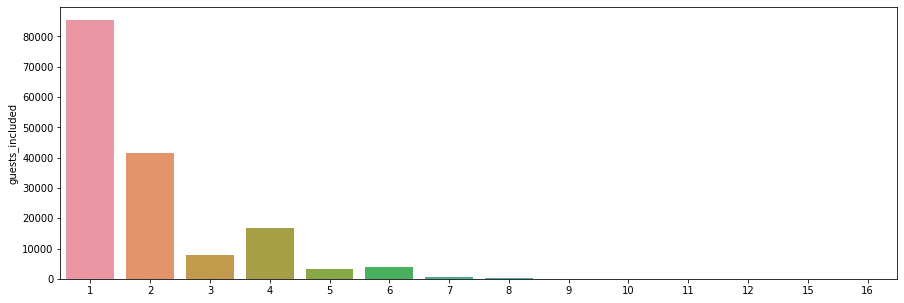

In [82]:
print(bounds(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())


In [83]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(159685, 26)

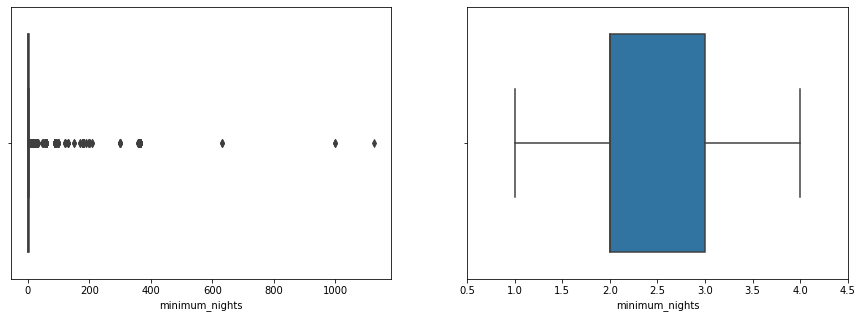

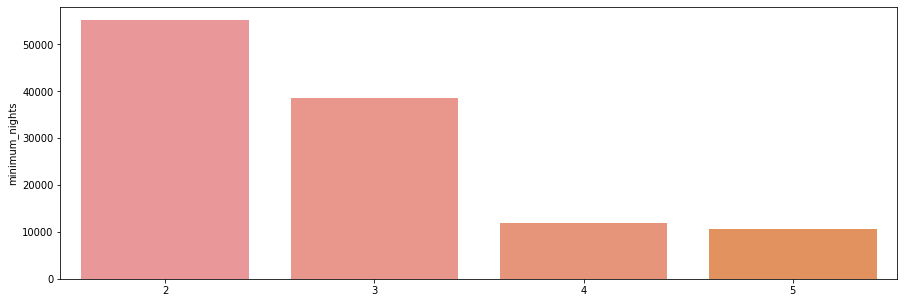

In [84]:
diagram_box(base_airbnb['minimum_nights'])
bar_graph(base_airbnb['minimum_nights'])


In [85]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'minimum_nights')
print('{} removed lines'.format(removed_lines))


19998 removed lines


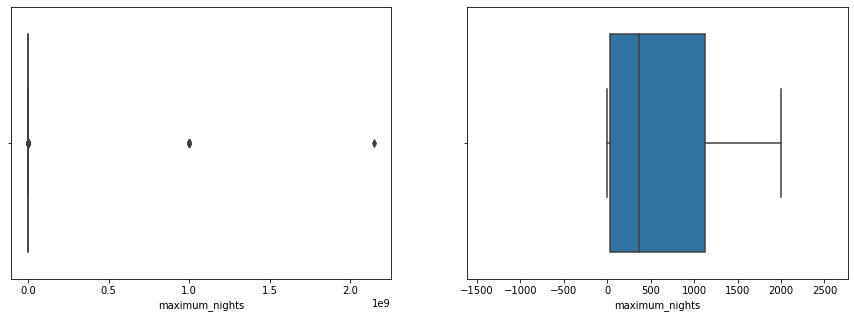

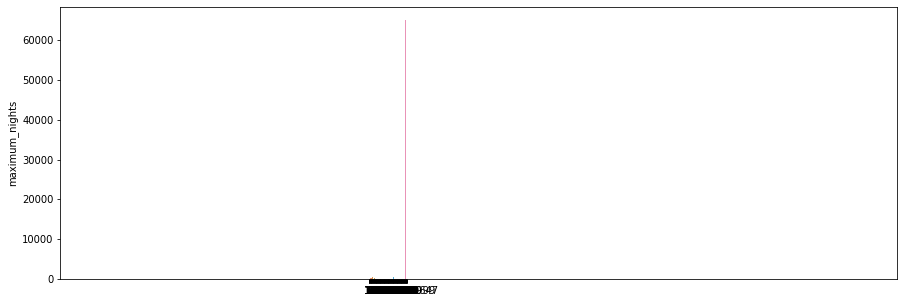

In [86]:
diagram_box(base_airbnb['maximum_nights'])
bar_graph(base_airbnb['maximum_nights'])


In [87]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(139687, 25)

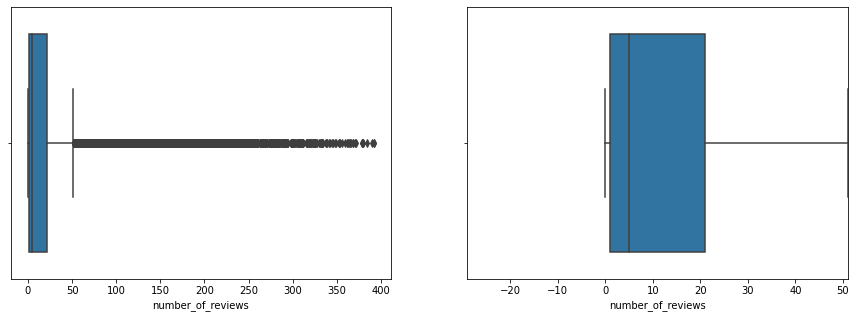

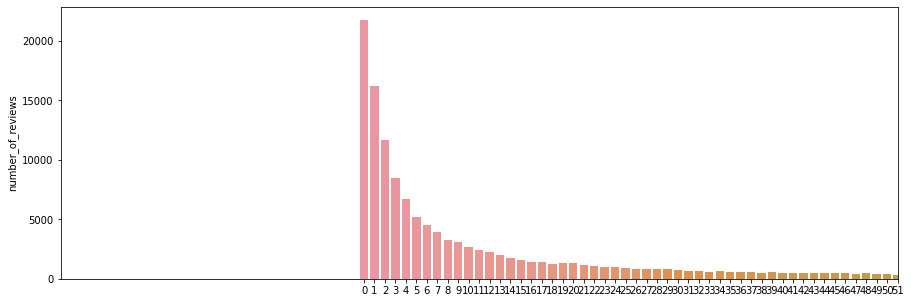

In [88]:
diagram_box(base_airbnb['number_of_reviews'])
bar_graph(base_airbnb['number_of_reviews'])


In [89]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape


(139687, 24)

Apartment                 106690
Condominium                 9676
House                       8457
Serviced apartment          5133
Loft                        4320
Guest suite                 1188
Guesthouse                   731
Bed and breakfast            663
Hostel                       629
Townhouse                    450
Hotel                        263
Aparthotel                   257
Other                        246
Villa                        196
Boutique hotel               196
Chalet                       163
Tiny house                   116
Cottage                       53
Earth house                   49
Bungalow                      47
Nature lodge                  28
Treehouse                     26
Island                        25
Cabin                         17
Casa particular (Cuba)        14
Campsite                      12
Hut                            8
Dome house                     7
Castle                         7
Tipi                           7
Yurt      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



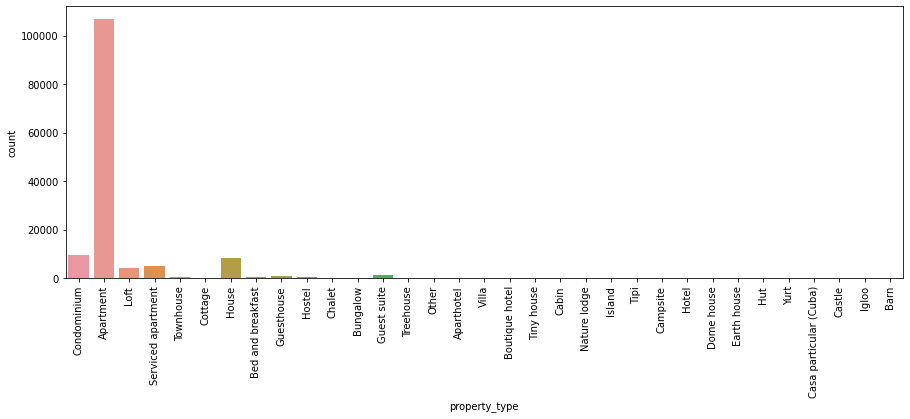

In [90]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

['Guest suite', 'Guesthouse', 'Bed and breakfast', 'Hostel', 'Townhouse', 'Hotel', 'Aparthotel', 'Other', 'Villa', 'Boutique hotel', 'Chalet', 'Tiny house', 'Cottage', 'Earth house', 'Bungalow', 'Nature lodge', 'Treehouse', 'Island', 'Cabin', 'Casa particular (Cuba)', 'Campsite', 'Hut', 'Dome house', 'Castle', 'Tipi', 'Yurt', 'Barn', 'Igloo']
Apartment             106690
Condominium             9676
House                   8457
Outros                  5411
Serviced apartment      5133
Loft                    4320
Name: property_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



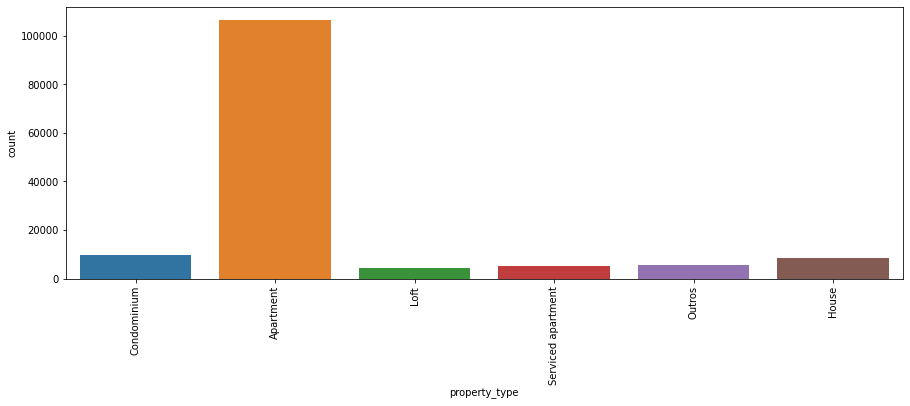

In [91]:
types_homes_table = base_airbnb['property_type'].value_counts()
group_columns = []

for types in types_homes_table.index:
    if types_homes_table[types] < 2000:
        group_columns.append(types)
print(group_columns)

for types in group_columns:
    base_airbnb.loc[base_airbnb['property_type']==types, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
graph = sns.countplot('property_type', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


Entire home/apt    100649
Private room        36144
Shared room          2248
Hotel room            646
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



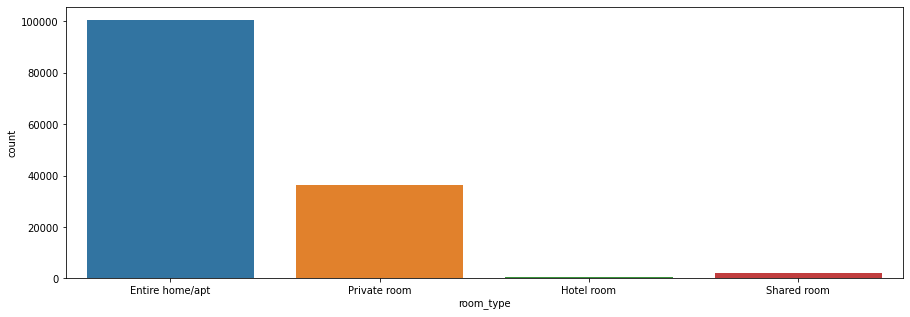

In [92]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


Real Bed         137937
Pull-out Sofa      1342
Futon               321
Couch                44
Airbed               43
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
Real Bed    137937
Outros        1750
Name: bed_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



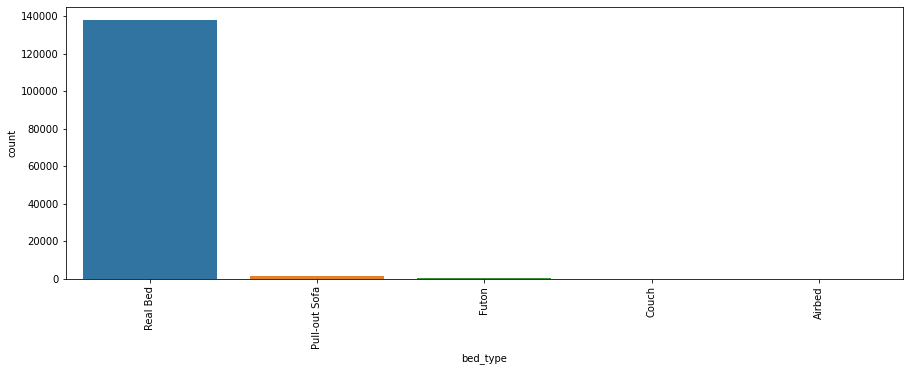

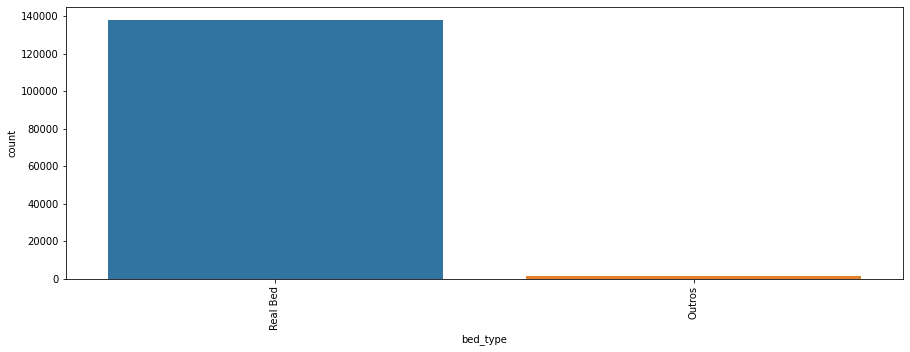

In [93]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot('bed_type', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


table_bed = base_airbnb['bed_type'].value_counts()
group_columns = []

for types in table_bed.index:
    if table_bed[types] < 10000:
        group_columns.append(types)
print(group_columns)

for types in group_columns:
    base_airbnb.loc[base_airbnb['bed_type']==types, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
graph = sns.countplot('bed_type', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


strict_14_with_grace_period    71396
moderate                       34301
flexible                       33606
super_strict_30                  236
super_strict_60                  130
strict                            18
Name: cancellation_policy, dtype: int64
['super_strict_30', 'super_strict_60', 'strict']
strict_14_with_grace_period    71396
moderate                       34301
flexible                       33606
strict                           384
Name: cancellation_policy, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



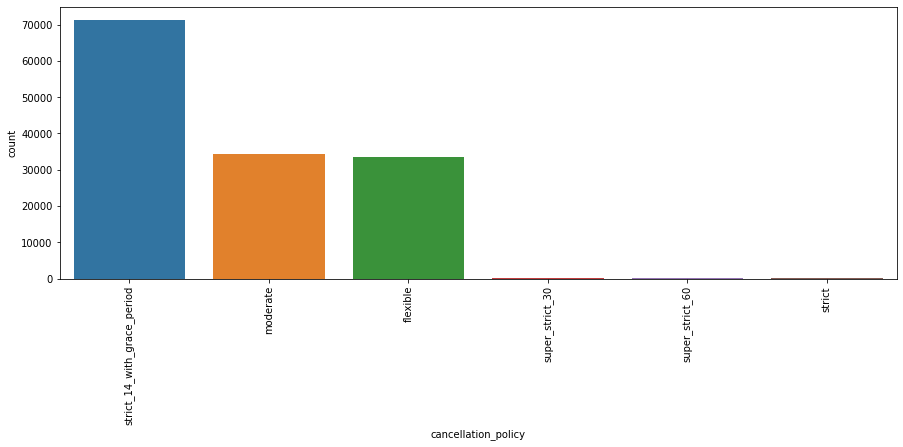

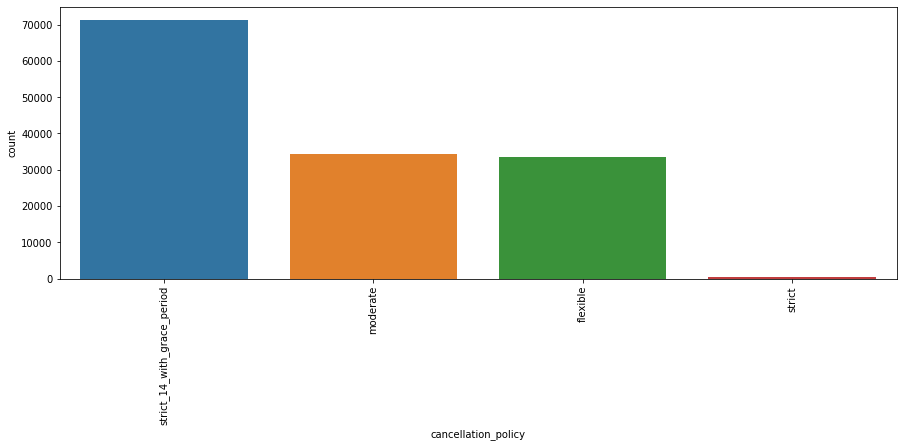

In [94]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
graph = sns.countplot('cancellation_policy', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


table_cancellation = base_airbnb['cancellation_policy'].value_counts()
group_columns = []

for types in table_cancellation.index:
    if table_cancellation[types] < 10000:
        group_columns.append(types)
print(group_columns)

for types in group_columns:
    base_airbnb.loc[base_airbnb['cancellation_policy']==types, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
graph = sns.countplot('cancellation_policy', data=base_airbnb)
graph.tick_params(axis='x', rotation=90)


In [95]:
print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)


['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', 'Essentials', 'Shampoo', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"translation missing: en.hosting_amenity_49"', '"translation missing: en.hosting_amenity_50"', '"Self check-in"', '"Building staff"', '"Hot water"', 'Microwave', '"Coffee maker"', 'Refrigerator', '"Dishes and silverware"', '"Cooking basics"}']
25


In [96]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape


(139687, 24)

In [97]:
base_airbnb = base_airbnb.drop('host_response_time', axis=1)
base_airbnb.shape


(139687, 23)

In [98]:
base_airbnb = base_airbnb.drop('host_response_rate', axis=1)
base_airbnb.shape

(139687, 22)

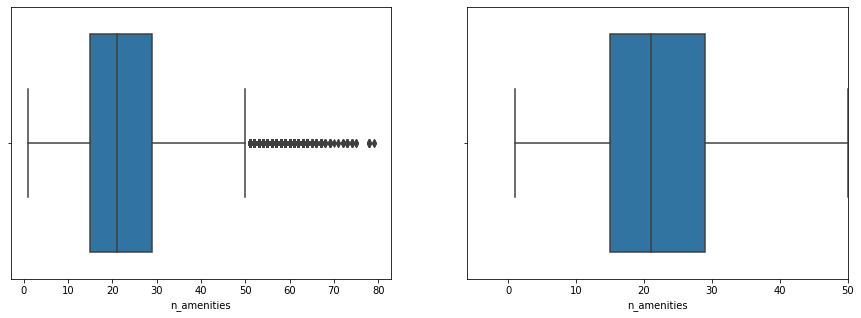

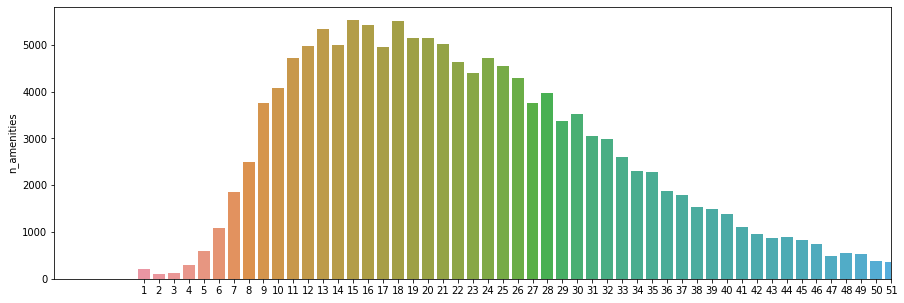

In [99]:
diagram_box(base_airbnb['n_amenities'])
bar_graph(base_airbnb['n_amenities'])


In [100]:
base_airbnb, removed_lines = exclude_outliers(base_airbnb, 'n_amenities')
print('{} removed lines'.format(removed_lines))


2447 removed lines


In [101]:
samples = base_airbnb.sample(n=50000)
center_map = {'lat':samples.latitude.mean(), 'lon':samples.longitude.mean()}
map = px.density_mapbox(samples, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=center_map, zoom=10,
                        mapbox_style='stamen-terrain')
map.show()


In [102]:
columns_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for column in columns_tf:
    base_airbnb_cod.loc[base_airbnb_cod[column]=='t', column] = 1
    base_airbnb_cod.loc[base_airbnb_cod[column]=='f', column] = 0
    

In [103]:
columns_categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=columns_categories)
display(base_airbnb_cod.head())


,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,year,month,n_amenities,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Outros,property_type_Serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period
0,1,2.0,-22.96592,-43.17896,5,1.0,2.0,2.0,329.0,0.0,374.0,62.0,4,1,0,2019,9,33,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,1.0,-22.98302,-43.21427,3,1.0,1.0,2.0,270.0,0.0,83.0,42.0,2,1,0,2019,9,25,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1,1.0,-22.98816,-43.19359,3,1.5,1.0,2.0,374.0,1040.0,171.0,62.0,2,0,0,2019,9,31,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1,1.0,-22.98127,-43.19046,2,1.0,1.0,1.0,129.0,400.0,140.0,80.0,3,0,0,2019,9,41,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
7,1,2.0,-22.98359,-43.19382,1,1.0,1.0,1.0,79.0,0.0,0.0,0.0,3,1,0,2019,9,45,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


**PREDICTION MODEL**

In [104]:
def evaluate_model(model_name, y_test, prediction):
    r2 = r2_score(y_test, prediction)
    RSME = np.sqrt(mean_squared_error(y_test, prediction))
    return f'Model {model_name}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'
    

CHOOSING MODEL
  
  RandomForest /
  LinearRegression /
  Extra Tree


In [105]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest': model_rf,
          'LinearRegression': model_lr,
          'ExtraTrees': model_et,
          }

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for model_name, model in models.items():
    #training
    model.fit(X_train, y_train)
    #testing
    prediction = model.predict(X_test)
    print(evaluate_model(model_name, y_test, prediction))


Model RandomForest:
R²:92.86%
RSME:37.59
Model LinearRegression:
R²:38.79%
RSME:110.08
Model ExtraTrees:
R²:93.99%
RSME:34.49
